### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [543]:
data = pd.read_csv('data/coupons.csv')

In [545]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [552]:
# Before I decide what to do with missing data, I want to see how much data is there
# as I would use the percent of rows with missing data to decide whether to drop 
# or repair/complete.
# The following facts are observed:
# * the car column has very few non-null values so it can be dropped
# * the other rows with nulls include a small percent of nulls with respect to the
#   total number of rows so they can be dropped (100s vs 12684)

print(data.shape)
data.isnull().sum()

(12684, 26)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [554]:
# From the above analysis I see that the 'car' column does not have many non-null entries so it is safe to drop
data = data.drop('car', axis=1)
data.isnull().sum()


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [339]:
# now drop the lines with no data as they are few (600 vs 12684 ~ 4%)
# We can see now that we are still left with 12079 rows and there are no null vales
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



Percent of customers who accepted coupon=56.84


Text(0.5, 1.0, 'Acceptance Coupon Ratio for General Population')

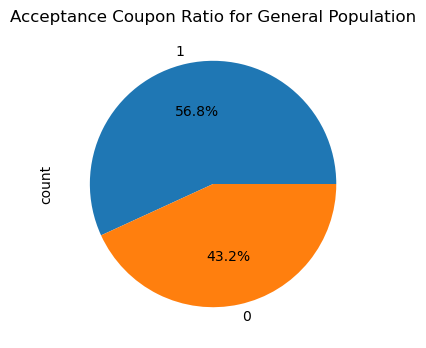

In [566]:
def print_percent_accepted(data, coupon_type):
    percent_accepted = round(100 * data.query('Y == 1')['Y'].count() / data['Y'].count(), 2)
    print(f'Percent of customers who accepted {coupon_type}={percent_accepted}')

print_percent_accepted(data, 'coupon')
data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  figsize=(4,4)).set_title('Acceptance Coupon Ratio for General Population')

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 0, 'Acceptance: 1-accepted, 0 rejected')

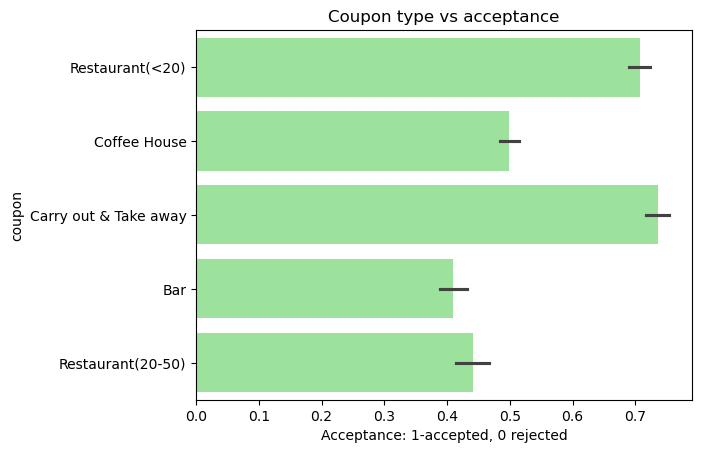

In [572]:
# From graph below we can see the most accepted coupon types are Carry out & Take away,
# followed by Restaurants(<20)
ax=sns.barplot(data, y='coupon', x='Y', color='lightgreen')
ax.set_title('Coupon type vs acceptance')
ax.set_xlabel('Acceptance: 1-accepted, 0 rejected')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Count of coupons given at different temperatures (Y=acceptance 1 or not 0)')

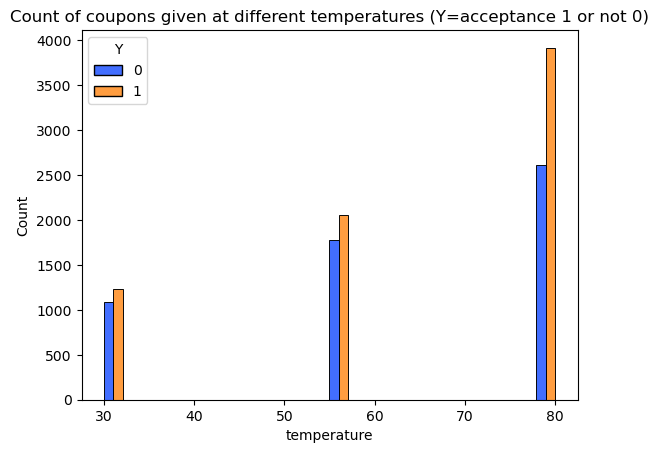

In [614]:
# Most coupons were given when temperatures are high and the accept rate seems 
# to be lower with lower temperatures and higher at higher temperatures
sns.set_palette('bright')
ax=sns.histplot(data, x='temperature', hue='Y', multiple="dodge")
ax.set_title('Count of coupons given at different temperatures (Y=acceptance 1 or not 0)')

Text(0.5, 1.0, 'Type of coupon vs Gender correlation')

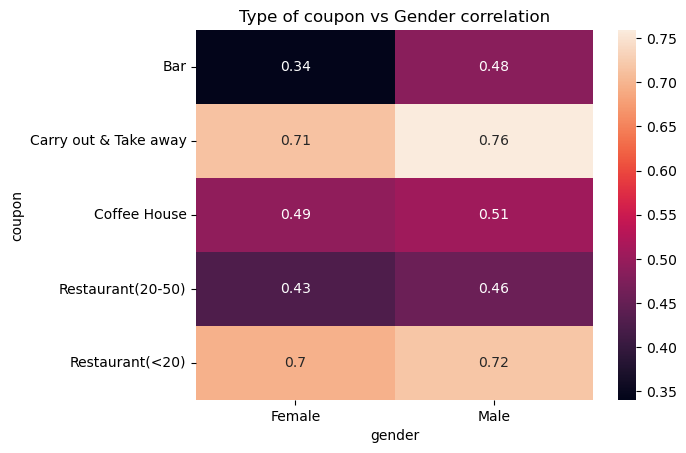

In [616]:
# We can use heatmaps to learn more about correlation between features and likelyhood 
# of coupons being selected.
# From this first map we find that males are slighltly more likely to select most kind of coupons 
# but will significantly select Bar coupons than women
coupon_gender_matrix = data.pivot_table(index='coupon', columns='gender', values='Y')
sns.heatmap(coupon_gender_matrix, annot=True).set_title('Type of coupon vs Gender correlation')

Text(0.5, 1.0, 'Type of coupon vs age correlation')

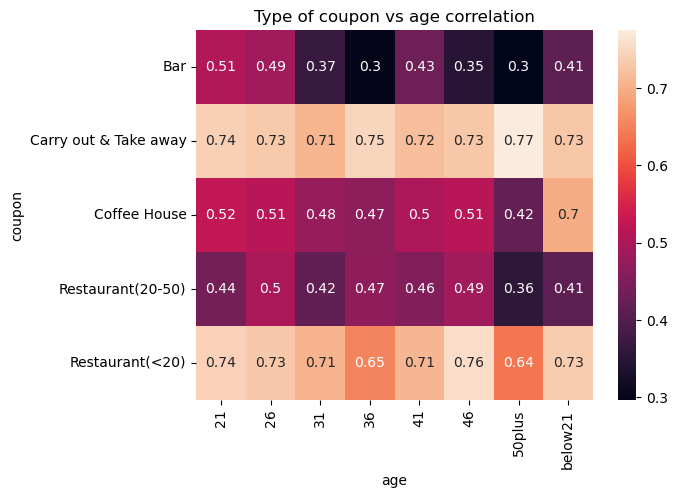

In [590]:
# Interesting facts form this heatmap are that younger people will amount for 
# significant share of accepted Bar coupons
# We can also see that Take Our and restaurants below 20 are popular with all ages
coupon_age_matrix = data.pivot_table(index='coupon', columns='age', values='Y')
sns.heatmap(coupon_age_matrix, annot=True).set_title('Type of coupon vs age correlation')

Text(0.5, 1.0, 'Type of coupon vs education correlation')

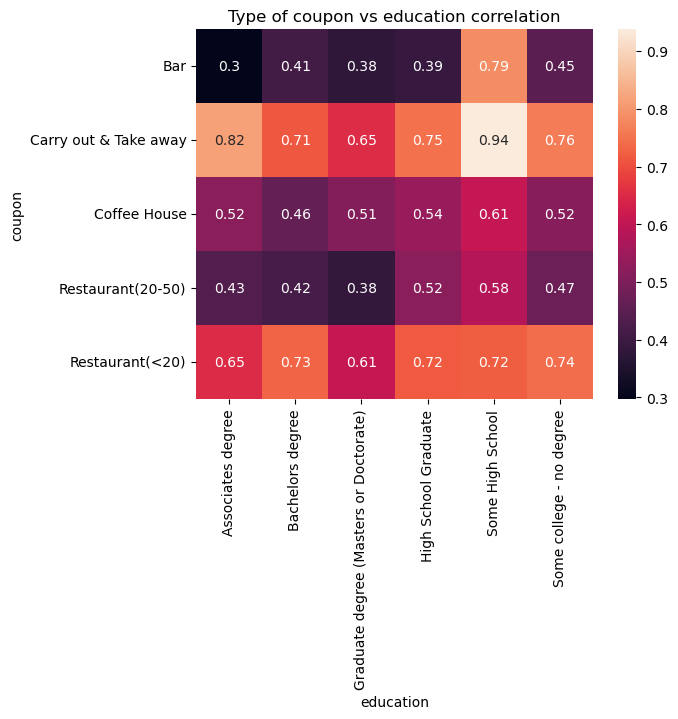

In [592]:
# Important facts from these heatmap are that Carry out and take out and Restaurant < 20 are 
# popular with all ages and also that those with some highschool will be most likely to 
# acept all coupons. Expensive restaurants are less popular with most education levels but
# specially with those highly educated.
coupon_education_matrix = data.pivot_table(index='coupon', columns='education', values='Y')
sns.heatmap(coupon_education_matrix, annot=True).set_title('Type of coupon vs education correlation')

Text(0.5, 1.0, 'Type of coupon vs destination correlation')

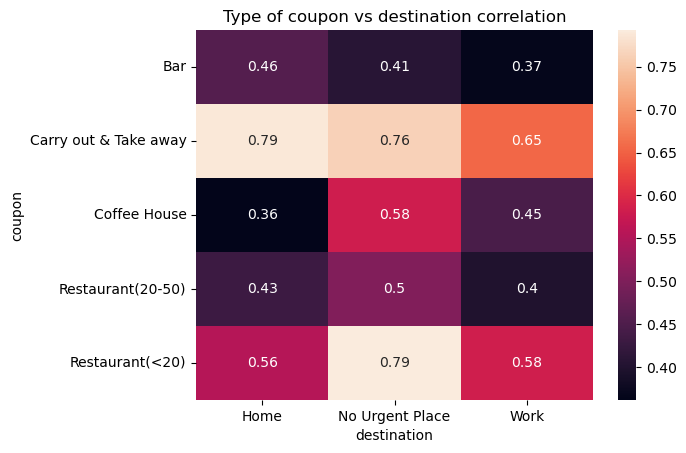

In [990]:
# The following heatpmap shows that the destination that leads to more accepts is Non Urgent ones
# almost all coupons but Bar are most accepted when user is driving toward that destination
# We can also note that Carry out and take away is the most likely to get accepted regardless of
# destination.
coupon_destination_matrix = data.pivot_table(index='coupon', columns='destination', values='Y')
sns.heatmap(coupon_destination_matrix, annot=True).set_title('Type of coupon vs destination correlation')

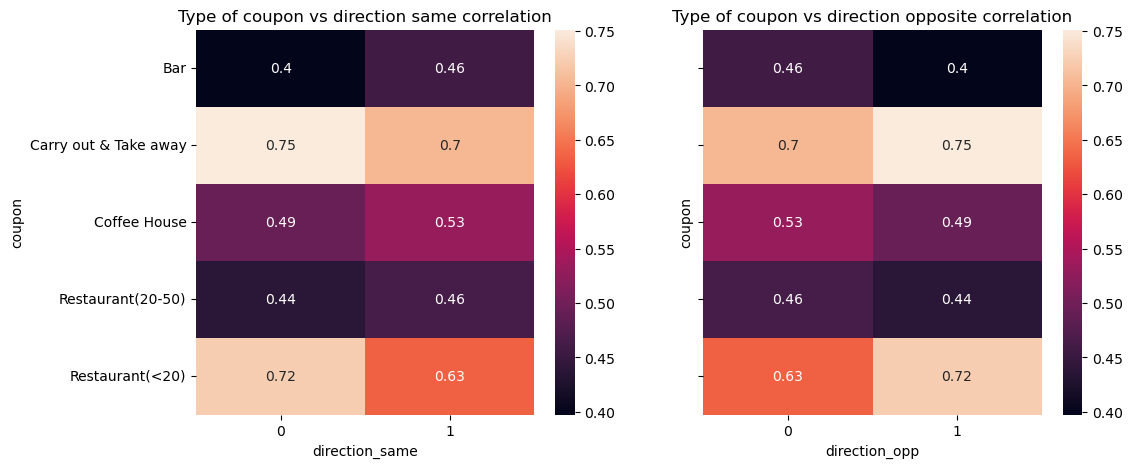

In [988]:
# When we examine the correlation between acceptance and direction of travel, the expectation is
# there would be more rejections for opposite direction and acceptance ffor same direction.
# This holds for most categories but Carry out and Restaurants less than 20: they are more
# likely to be accepted when travelling in the opoosite direction which is counter intuitive.
same_direction_matrix = data.pivot_table(index='coupon', columns='direction_same', values='Y')
opposite_direction_matrix = data.pivot_table(index='coupon', columns='direction_opp', values='Y')


fig, axs = plt.subplots(1, 2, sharex='all', sharey='all')
sns.heatmap(same_direction_matrix, annot=True, ax=axs[0]).set_title('Type of coupon vs direction same correlation')
sns.heatmap(opposite_direction_matrix, annot=True, ax=axs[1]).set_title('Type of coupon vs direction opposite correlation')
fig.set_size_inches(12,5)

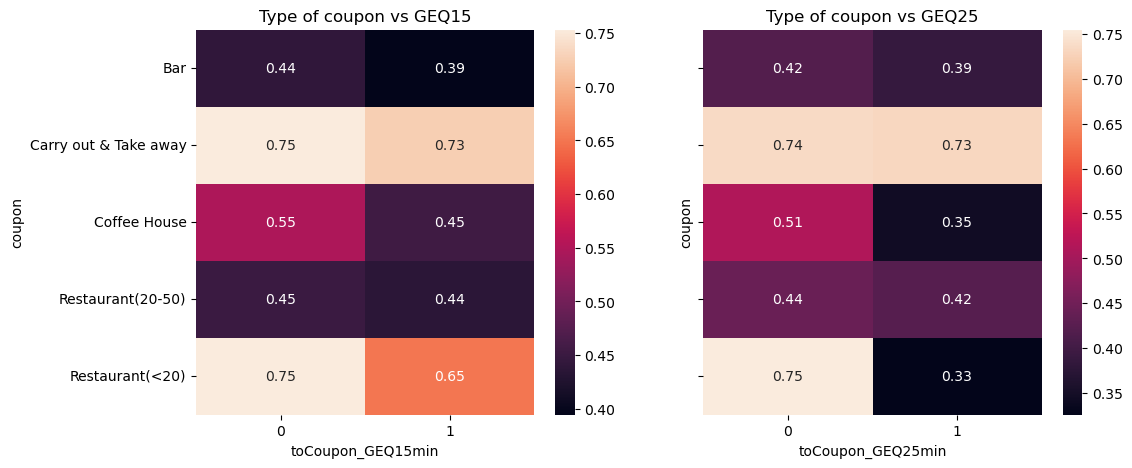

In [998]:
# As expected most coupons are rejected if they are too far drive except for carry out and bars
# where distance does not seem to change the accept rate significantly.
GEQ25_matrix = data.pivot_table(index='coupon', columns='toCoupon_GEQ25min', values='Y')
GEQ15_matrix = data.pivot_table(index='coupon', columns='toCoupon_GEQ15min', values='Y')


fig, axs = plt.subplots(1, 2, sharex='all', sharey='all')
sns.heatmap(GEQ15_matrix, annot=True, ax=axs[0]).set_title('Type of coupon vs GEQ15')
sns.heatmap(GEQ25_matrix, annot=True, ax=axs[1]).set_title('Type of coupon vs GEQ25')
fig.set_size_inches(12,5)

Percent of acceptance per age group:
age
21         59.82
26         59.59
31         54.63
50plus     50.89
36         53.53
41         57.27
46         57.58
below21    63.44
Name: count, dtype: float64


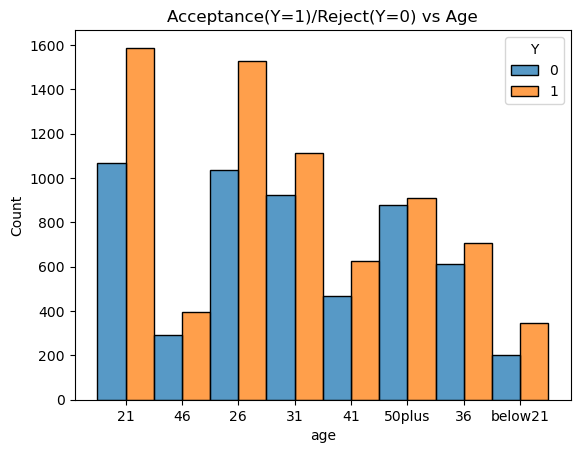

In [600]:
# What ages are more likely to accept: younger below 21, 21 and 26 are the most likely to accept while 
# those over 50 are the least likely 
sns.histplot(data, x='age', hue='Y', multiple="dodge").set_title('Acceptance(Y=1)/Reject(Y=0) vs Age') 
print("Percent of acceptance per age group:")
print(round(100*data.query('Y == 1')['age'].value_counts()/data['age'].value_counts(), 2))



Text(0.5, 1.0, 'Coupon type vs distribution of acceptance/reject')

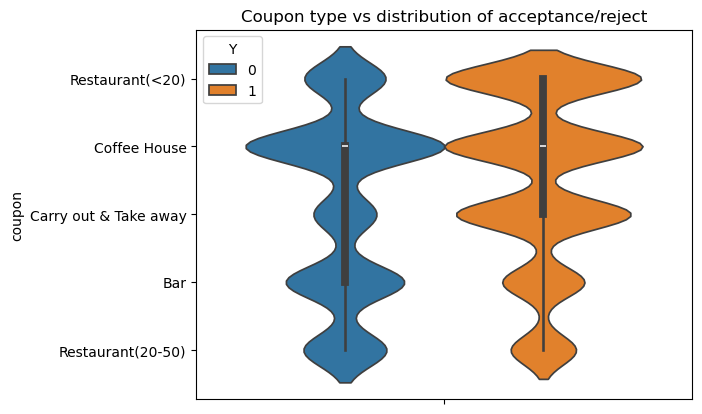

In [598]:
# Interesting facts about coupon acceptance rates:
# Restaurants under 20 and Carry Out seem more likely to get accepted
# Bar and restaurants 20-50 coupons are more likely to be rejected
# Coffee house coupons seems equally likely to be accepted or rejected

sns.violinplot(data, y='coupon', hue='Y').set_title('Coupon type vs distribution of acceptance/reject')

Text(0.5, 1.0, 'Coupon type Acceptance/Reject vs Has Children')

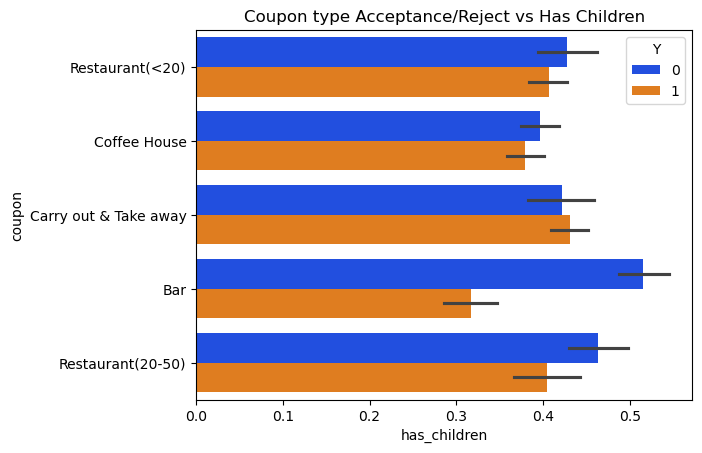

In [620]:
# Following plot shows
# Customers with children are more likely to take carry out coupons but will reject Bar coupons most often
# Also customers with children will avoid expensive restaurants 20-50
sns.barplot(data, x='has_children', y='coupon', hue='Y').set_title('Coupon type Acceptance/Reject vs Has Children')

Text(0.5, 1.0, 'Coupon Acceptance/Reject vs Weather')

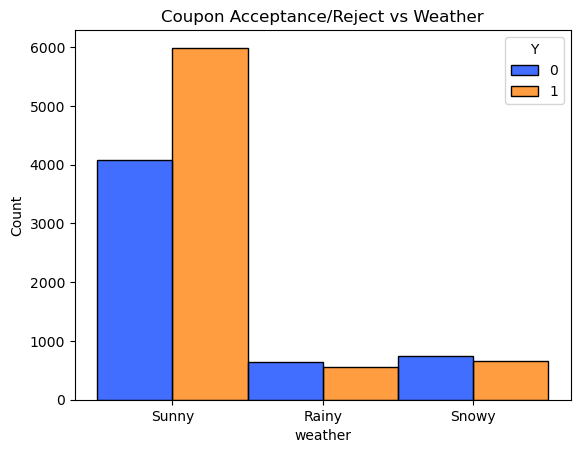

In [618]:
# From Chart below seems like acceptance rate is higher during sunny weather
# and significant lower in rainy and snowy days
sns.histplot(data, x ='weather', hue='Y', multiple="dodge").set_title("Coupon Acceptance/Reject vs Weather")

Text(0.5, 1.0, 'Coupon Acceptance/Reject vs Distribution Time')

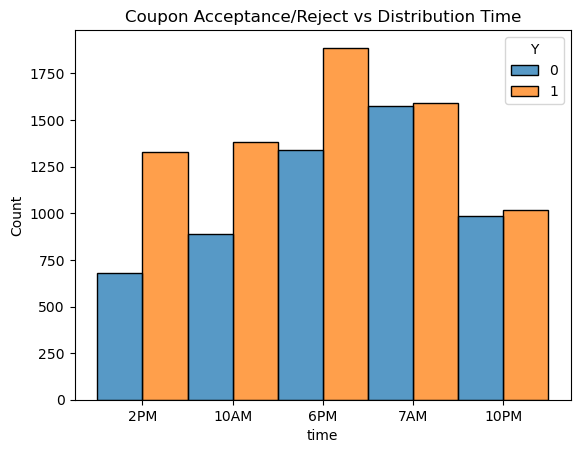

In [610]:
# Following chart shows that coupons given either too early or too late are less likely to be accepted
# and those given either at 10am or 2pm are the more likely to get accepted
sns.histplot(data, x='time', hue='Y', multiple="dodge").set_title('Coupon Acceptance/Reject vs Distribution Time')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [636]:
bar_data = data.copy()
bar_data = bar_data.query("coupon == 'Bar'")
bar_data.head()
                      

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Percent of customers who accepted Bar Coupons=41.0


Text(0.5, 1.0, 'Percent of Acceptance for Bar Coupon (General Population)')

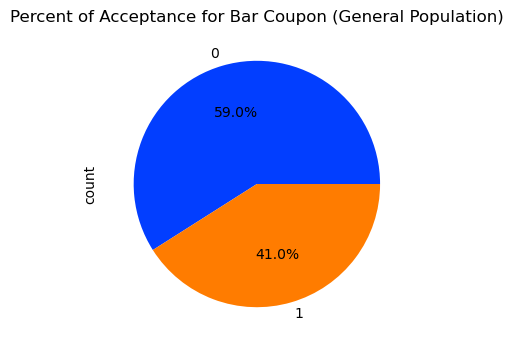

In [638]:
print_percent_accepted(bar_data, 'Bar Coupons')
bar_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (General Population)')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Percent of customers who accepted (Bar Dweller)=76.88
Percent of customers who accepted (Bar Infrequents)=37.06


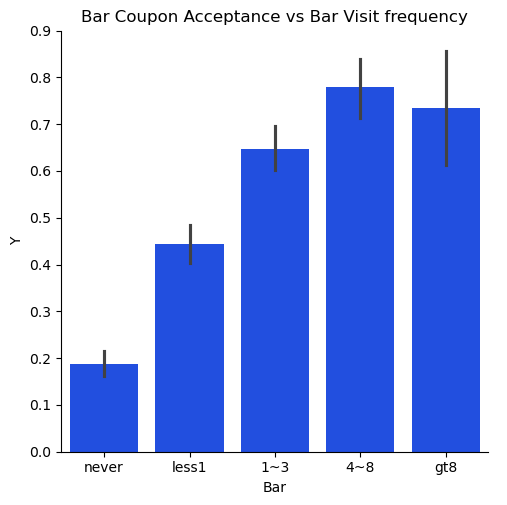

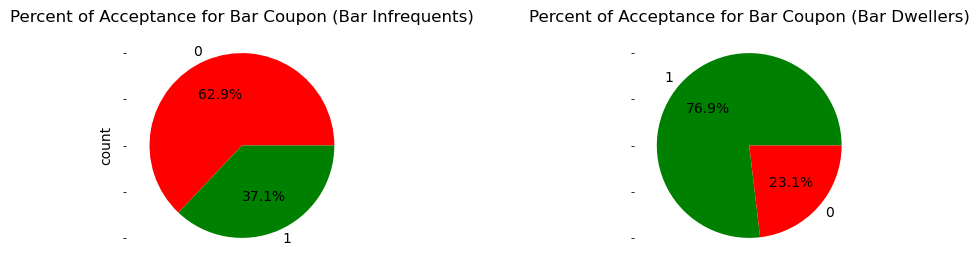

In [722]:
# In the following text I will refer to those who went 4 or more times to the bar as "Bar Dwellers"
# I will also use "Bar Infrequents" to refer to those that have been to the bar 3 times or less.
# Data shows Bar dwellers are twice as likely to accept the Bar coupons which is not a surprise.
# NOTE: Given the how categories for Bar data are grouped we cant directly answer the given question,
# just a modified version of it: compare those that went to the bar 4 or more times vs those who went
# 3 or less.

# Sort categories for nice display in histograms
bar_data.Bar = pd.Categorical(bar_data.Bar, categories=['never', 'less1', '1~3', '4~8', 'gt8'], ordered=True)

three_or_fewer = ["never", "less1", "1~3"]
four_or_larger = ["4~8", "gt8"]
bar_3_or_fewer = bar_data[bar_data.Bar.isin(three_or_fewer)]
bar_4_or_greater = bar_data[bar_data.Bar.isin(four_or_larger)]

print_percent_accepted(bar_4_or_greater, '(Bar Dweller)')
print_percent_accepted(bar_3_or_fewer, '(Bar Infrequents)')

ax = sns.catplot(bar_data, x = 'Bar', y='Y', kind='bar')
plt.suptitle('Bar Coupon Acceptance vs Bar Visit frequency', y=1, x=0.55)
plt.show()

# Need the following lines to sync colors among subplots so all accepts appear 
# green and rejects appear red.
colors={ 0 :'red', 1 :'green'}

def get_pie_y_label_colors(data):
    return [colors[v] for v in data['Y'].value_counts().keys()]


fig, axs = plt.subplots(1, 2, sharex='all', sharey='all')
bar_3_or_fewer['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(bar_3_or_fewer), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Bar Infrequents)')
bar_4_or_greater['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(bar_4_or_greater), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Bar Dwellers)')
fig.set_size_inches(12,3)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Percent of customers who accepted Bar (General Population)=41.0
Percent of customers who accepted Bar (Older Bar Dwellers)=69.52


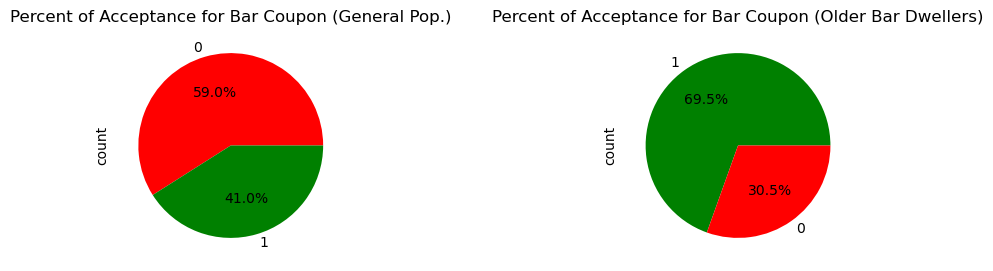

In [724]:
# From below calculations we can see that people who frequent bar and are older than 25 have ~69% likelyhood of accepting
# vs about 41% of all who were given a coupon
# In the graphs I will refer to the group as 'Older Bar Dwellers'
# NOTE: Again, due to the categorization of the Bar feature we cannot directly answer the question of 'more than once' but instead
# we only can answer the question of 'once or more'
more_than_once = ["1~3", "4~8", "gt8"]
over_25 = ["26", "31", "36", "41", "46", "50plus"]
older_bar_dwellers = bar_data[bar_data.Bar.isin(more_than_once) & bar_data.age.isin(over_25)]
print_percent_accepted(bar_data, 'Bar (General Population)')
print_percent_accepted(older_bar_dwellers, 'Bar (Older Bar Dwellers)')

fig, axs = plt.subplots(1, 2)
bar_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(bar_data), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (General Pop.)')
older_bar_dwellers['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(older_bar_dwelers), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Older Bar Dwellers)')
fig.set_size_inches(12,3)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Percent of customers who accepted Bar (General Population)=41.0
Percent of customers who accepted (Bar Non-farmers, Groupies)=71.79


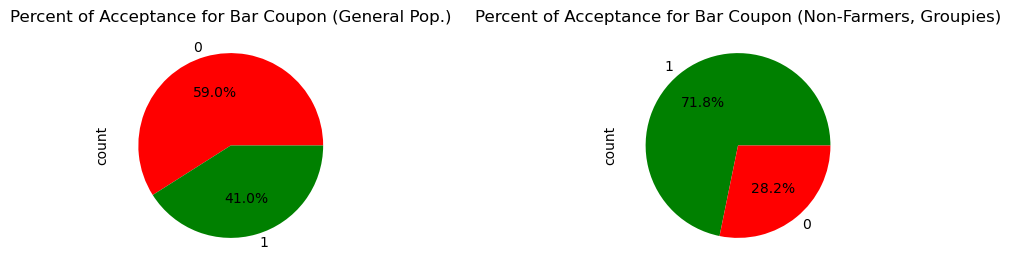

In [734]:
# People in this category are significantly more likely to accept the coupon than
# general population and even 'Older Bar Dwellers' studied before
# I refer to this group as 'Non Farmers, Groupies'
bar_cat_5 = bar_data[bar_data.Bar.isin(more_than_once) & ~bar_data.passanger.isin(["Alone", "Kid(s)"]) & ~bar_data.occupation.isin(['Farming Fishing & Forestry'])]

print_percent_accepted(bar_data, 'Bar (General Population)')
print_percent_accepted(bar_cat_5, '(Bar Non-farmers, Groupies)')

fig, axs = plt.subplots(1, 2)
bar_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(bar_data), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (General Pop.)')
bar_cat_5['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(bar_cat_5), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Non-Farmers, Groupies)')
fig.set_size_inches(12,3)



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Percent of customers who accepted Bar (General Population)=41.0
Percent of customers who accepted Bar (Catgory 6 Population)=58.89


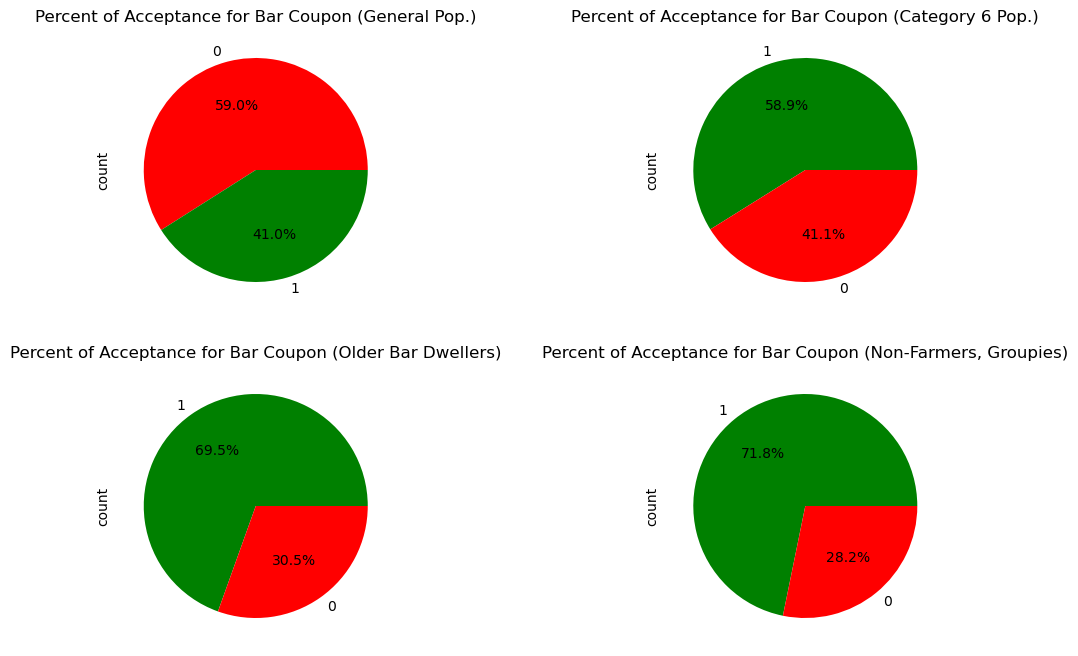

In [765]:
# This group is also more likely than full population to accept the coupon, but less likely that category 5 above
less_than_50K = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
# NOTE: given the way data is structured we cant do 'more than 4 times' but instead we have to do '4 times or more'
more_than_4 = ['4~8', 'gt8']
age_under_30 = ['21', 'below21', '26']
bar_cat_6 = bar_data[(bar_data.Bar.isin(more_than_once) & ~bar_data.passanger.isin(["Kid(s)", "Widowed"])) |
                      (bar_data.Bar.isin(more_than_once) & (bar_data.age.isin(age_under_30))) |
                      (bar_data.RestaurantLessThan20.isin(more_than_4) & bar_data.income.isin(less_than_50K))]

print_percent_accepted(bar_data, 'Bar (General Population)')
print_percent_accepted(bar_cat_6, 'Bar (Catgory 6 Population)')

fig, axs = plt.subplots(2, 2)

bar_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0, 0], colors=get_pie_y_label_colors(bar_data), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (General Pop.)')
bar_cat_6['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[0, 1], colors=get_pie_y_label_colors(bar_cat_6), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Category 6 Pop.)')
older_bar_dwellers['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 0], colors=get_pie_y_label_colors(older_bar_dwelers), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Older Bar Dwellers)')
bar_cat_5['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1, 1], colors=get_pie_y_label_colors(bar_cat_5), figsize=(4,4)).set_title('Percent of Acceptance for Bar Coupon (Non-Farmers, Groupies)')

fig.set_size_inches(13,8)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [383]:
# Seems fair to conclude that
# people without kids and other adults as passengers are more likely to accept the bar coupons
# People who visit bars more than once a month are more likely to accept the coupons
# Since category 6 above combines a number of different grousp I would not use it as conclusive material

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

From the previuos investigation seems the following two hypothesis may hold:
+People traveling with kids, lower income, will most likely accept coupons for restaurants of less than 20
In the next few cells I will try to prove or disprove these assumptions.

In [930]:
# First, I separate the less than 20 rows
lessThan20_data = data.copy()
lessThan20_data = lessThan20_data.query("coupon == 'Restaurant(<20)'")
lessThan20_data.shape

# Establish some logical order for some of the features so the plots make more sense
lessThan20_data['RestaurantLessThan20'] = pd.Categorical(lessThan20_data['RestaurantLessThan20'], categories=['gt8', '4~8', '1~3', 'less1', 'never'], ordered=True)
lessThan20_data['education'] = pd.Categorical(lessThan20_data['education'], categories=['Graduate degree (Masters or Doctorate)', 'Bachelors degree',  'Associates degree', 'Some college - no degree','High School Graduate', 'Some High School'], ordered=True)
lessThan20_data['maritalStatus'] = pd.Categorical(lessThan20_data['maritalStatus'], categories=['Married partner', 'Unmarried partner',  'Single', 'Divorced','Widowed'], ordered=True)


Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


Text(0.5, 1.0, "Percent of Acceptance for 'Restaurant(<20)' Coupon (General Population)")

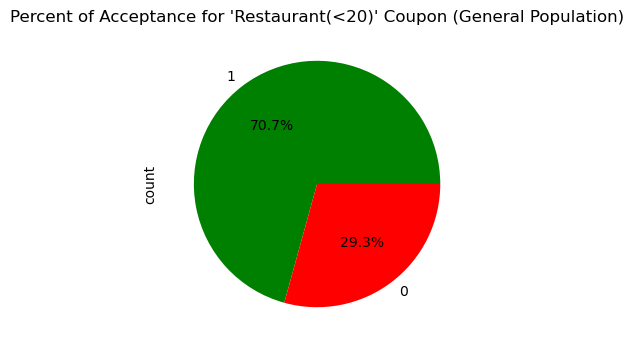

In [932]:
# Now we examine the rate of acceptance by the general population for this group
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  figsize=(4,4), colors=get_pie_y_label_colors(lessThan20_data)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Population)")


Percent of customers who accepted 'Restaurant(<20)' Coupons (Travelling with kids)=72.28


Text(0.5, 1.0, "Percent of Acceptance for 'Restaurant(<20)' Coupon (Travelling with kids)")

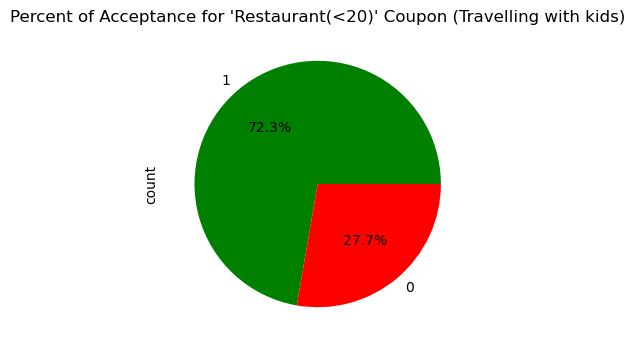

In [934]:
# Part of my theory is that parents travelling with kids will accept this type of coupons 
# with higher probability.
# However, data does not support that showing only a slight higer probability (71.1 vs 70.9 general population)
parents_lessThan20_data = lessThan20_data[lessThan20_data.passanger.isin(['Kid(s)'])]
print_percent_accepted(parents_lessThan20_data, "'Restaurant(<20)' Coupons (Travelling with kids)")
parents_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  figsize=(4,4), colors=get_pie_y_label_colors(parents_lessThan20_data)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Travelling with kids)")


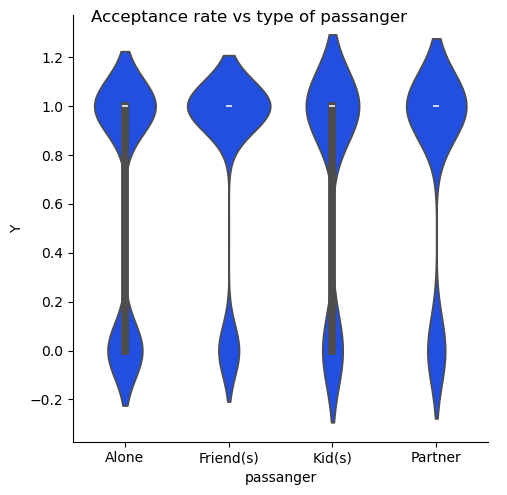

In [936]:
# Since the predicton above failed, I used a catplots to see what category has higher acceptance
# for passangers feature and conclude that those travelling with friends are more likely to accept
# this type of coupon. you can also see that those travelling with kids and alone are less likely 
# to accept these coupons.
ax = sns.catplot(lessThan20_data, x = 'passanger', y='Y', kind='violin')
plt.suptitle('Acceptance rate vs type of passanger')
plt.show()

Percent of customers who accepted 'Restaurant(<20)' Coupons (Travelling with kids)=80.15
Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


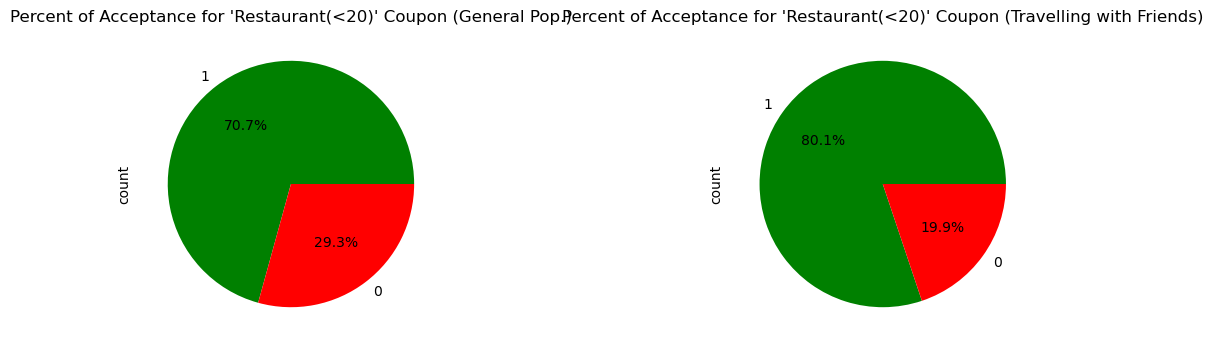

In [938]:
# Given the information above I now set to show that the acceptance rate for this coupon among
# those travelling with Friends is about 10 points higher than that of the general population that received this 
# type of coupon

friends_lessThan20_data = lessThan20_data[lessThan20_data.passanger.isin(['Friend(s)'])]

print_percent_accepted(friends_lessThan20_data, "'Restaurant(<20)' Coupons (Travelling with kids)")
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
friends_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(friends_lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Travelling with Friends)")
fig.set_size_inches(14,4)

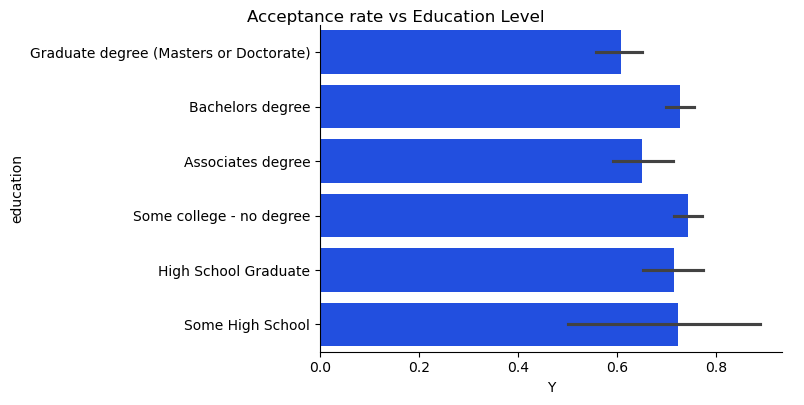

Percent of customers who accepted 'Restaurant(<20)' Coupons (No College)=73.75
Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


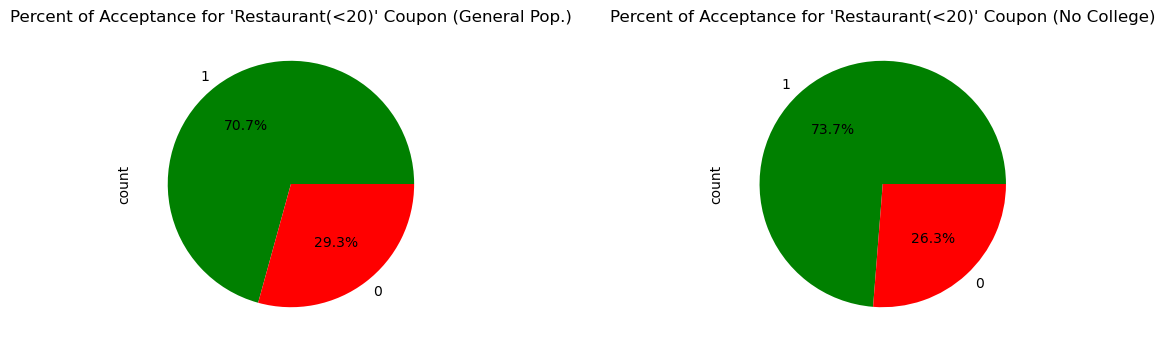

In [952]:
# I can use catplots to check if specific incomes or education levels are expected to have
# significant influence in acceptance of these coupons. This plot shows some small bias to accept 
# by those with only some high school education, high-school degree, and some college
ax = sns.catplot(lessThan20_data, y = 'education', x='Y', kind='bar', height=4, aspect=2)
plt.suptitle('Acceptance rate vs Education Level', y=1)
plt.show()
no_college = ['Some college - no degree', 'High School Graduate', 'Some High School']

no_college_lessThan20_data = lessThan20_data[lessThan20_data.education.isin(no_college)]
print_percent_accepted(no_college_lessThan20_data, "'Restaurant(<20)' Coupons (No College)")
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
no_college_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(no_college_lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (No College)")
fig.set_size_inches(14,4)

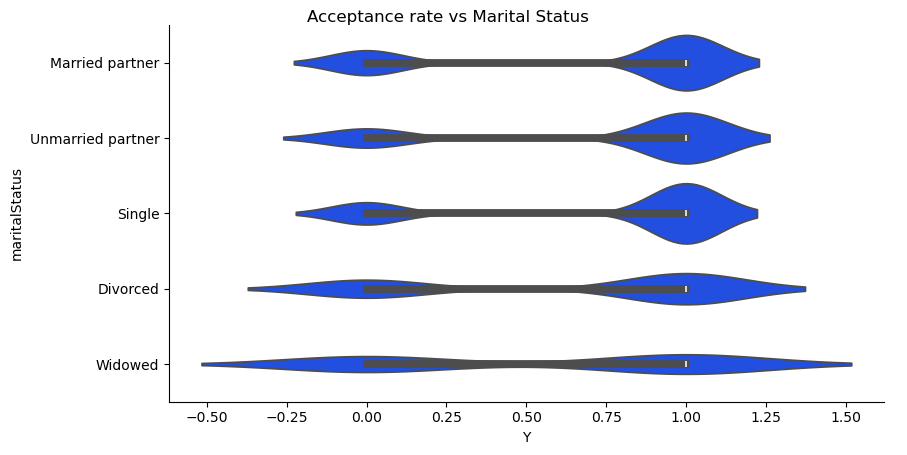

Percent of customers who accepted 'Restaurant(<20)' Coupons (Partnered and Singles)=71.22
Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


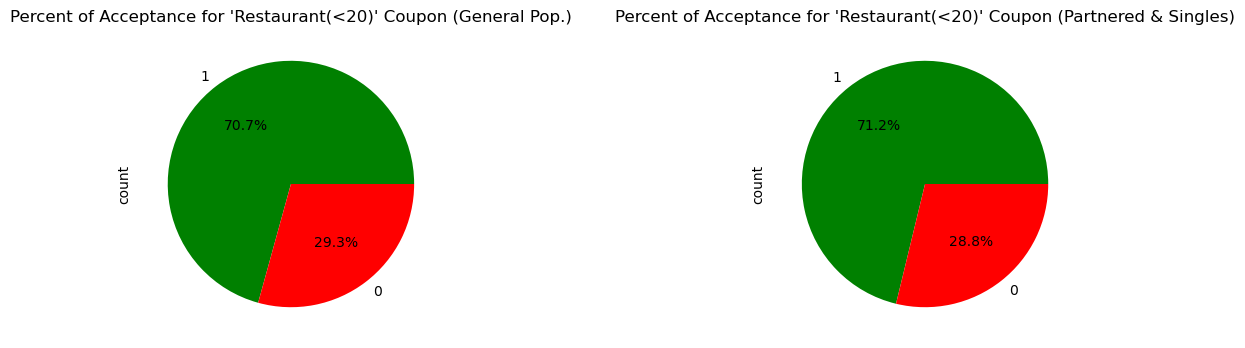

In [958]:
# Trying a few catplots on gender, age and maritalStatus I found that 
# those partnered and single are more likely to accept coupons for this category.
# Gender and age plots not shown did not reveal any significant bias
ax = sns.catplot(lessThan20_data, y = 'maritalStatus', x='Y', kind='violin', height=4.5, aspect=2)
plt.suptitle('Acceptance rate vs Marital Status', y =1)
plt.show()

partnered_and_single = ['Married partner', 'Unmarried partner','Single']

partnered_lessThan20_data = lessThan20_data[lessThan20_data.maritalStatus.isin(partnered_and_single)]
print_percent_accepted(partnered_lessThan20_data, "'Restaurant(<20)' Coupons (Partnered and Singles)")
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
partnered_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(partnered_lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Partnered & Singles)")
fig.set_size_inches(15,4)

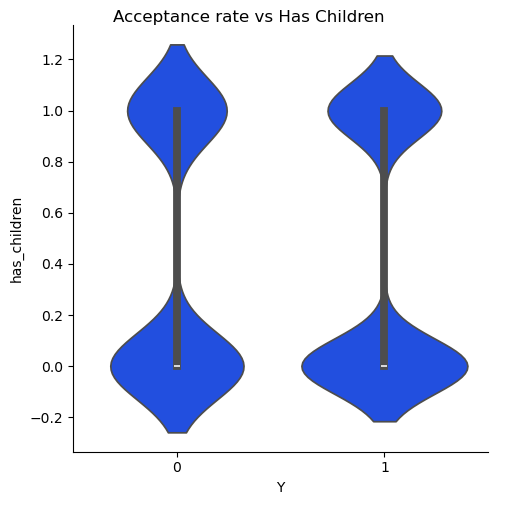

Percent of customers who accepted 'Restaurant(<20)' Coupons (Childless)=71.45
Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


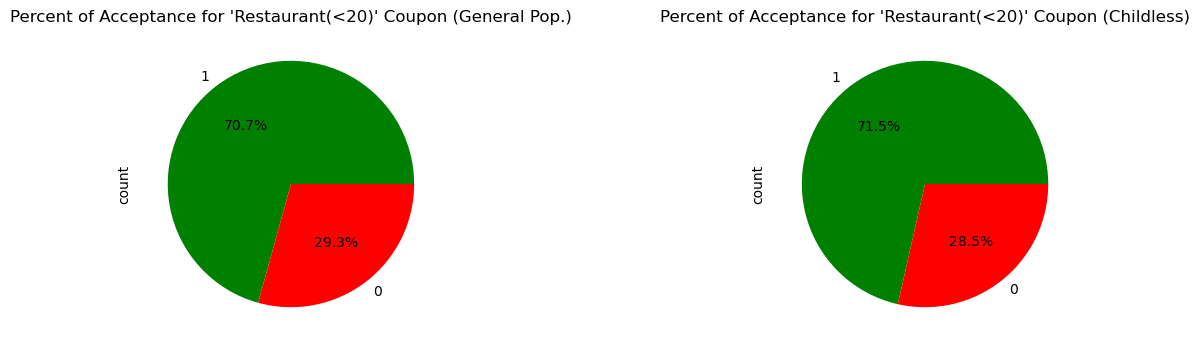

In [960]:
# Those with no children seem to be more likely to take this type of coupon than those that
# have children
ax = sns.catplot(lessThan20_data, y = 'has_children', x='Y', kind='violin')
plt.suptitle('Acceptance rate vs Has Children', y =1)
plt.show()

childless_lessThan20_data = lessThan20_data[lessThan20_data['has_children'] == 0]

print_percent_accepted(childless_lessThan20_data, "'Restaurant(<20)' Coupons (Childless)")
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
childless_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(childless_lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Childless)")
fig.set_size_inches(15,4)

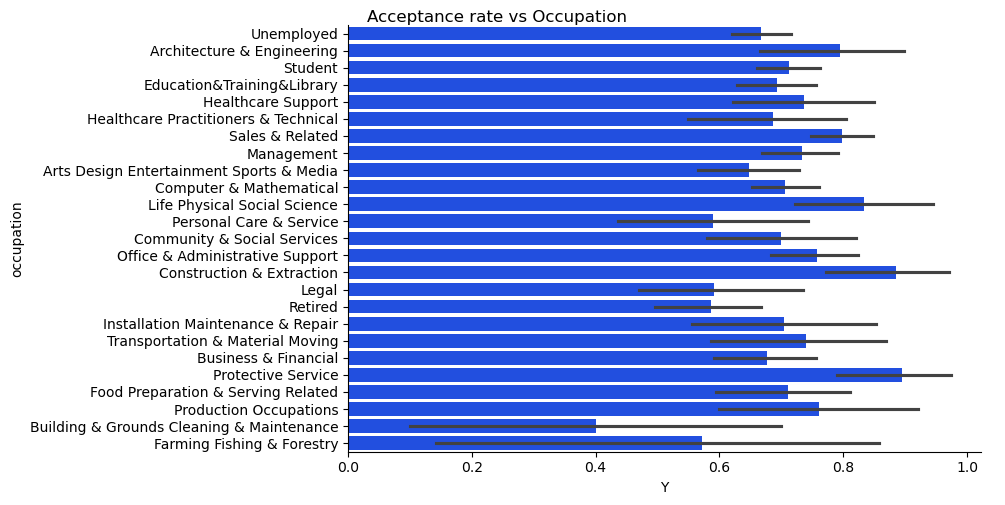

Percent of customers who accepted 'Restaurant(<20)' Coupons (Special Occupations)=85.14
Percent of customers who accepted 'Restaurant(<20)' Coupons=70.71


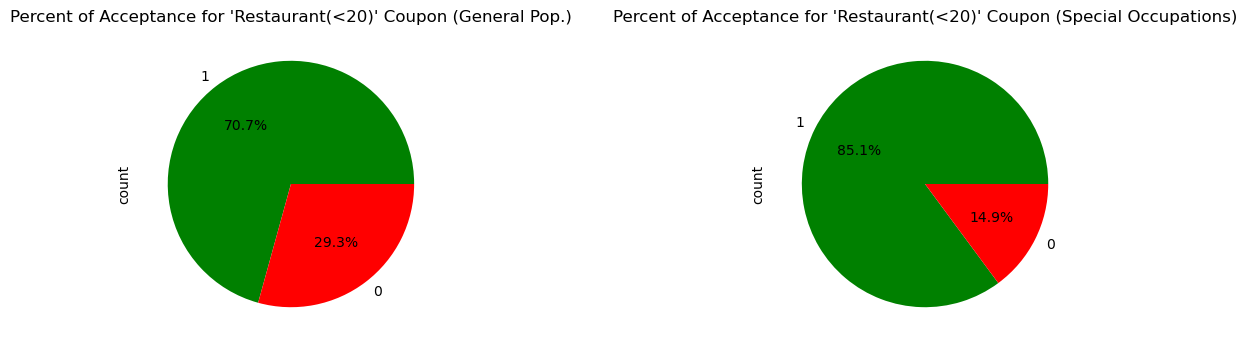

In [962]:
# It is clear from the catplot below that certain occupations have higher acceptance ratios
# Including 'Construction & Extraction', 'Protective Services'
sns.catplot(lessThan20_data, y = 'occupation', x='Y', kind='bar', height=5, aspect=2)
plt.suptitle('Acceptance rate vs Occupation', y =1)
plt.show()

less20_occupations = ['Construction & Extraction', 'Protective Service', 'Life Physical Social Science', 'Architecture & Engineering' ]
occupation_lessThan20_data = lessThan20_data[lessThan20_data.occupation.isin(less20_occupations)]
print_percent_accepted(occupation_lessThan20_data, "'Restaurant(<20)' Coupons (Special Occupations)")
print_percent_accepted(lessThan20_data, "'Restaurant(<20)' Coupons");
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
occupation_lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(occupation_lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Special Occupations)")
fig.set_size_inches(15,4)

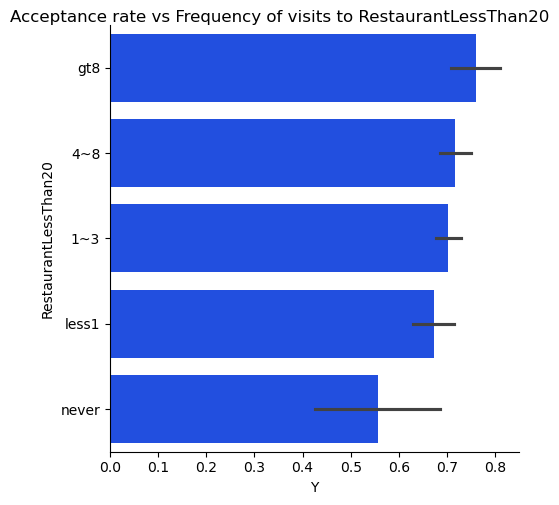

In [948]:
# And as expected those who frequent most these type of restaurants (i.e. 'gt8') are more 
# likely to accept these coupons.
sns.catplot(lessThan20_data, y = 'RestaurantLessThan20', x='Y', kind='bar')
plt.suptitle('Acceptance rate vs Frequency of visits to RestaurantLessThan20', y =1)
plt.show()

In [950]:
# At this point I have a good profile of the most likely customers to accept these 
# type of coupons so I can try to compute the acceptance rate and compare with
# the general propulation that received these coupons

ideal_lessThan20_target = lessThan20_data[lessThan20_data.passanger.isin(['Friend(s)']) 
    & lessThan20_data.education.isin(no_college)
    & lessThan20_data.maritalStatus.isin(partnered_and_single)
    & (lessThan20_data['has_children'] == 0)
    & lessThan20_data.occupation.isin(less20_occupations)]


Percent of customers who accepted Restaurant(<20) Target Group=91.67
Percent of customers who accepted Restaurant(<20) (General Population)=70.71


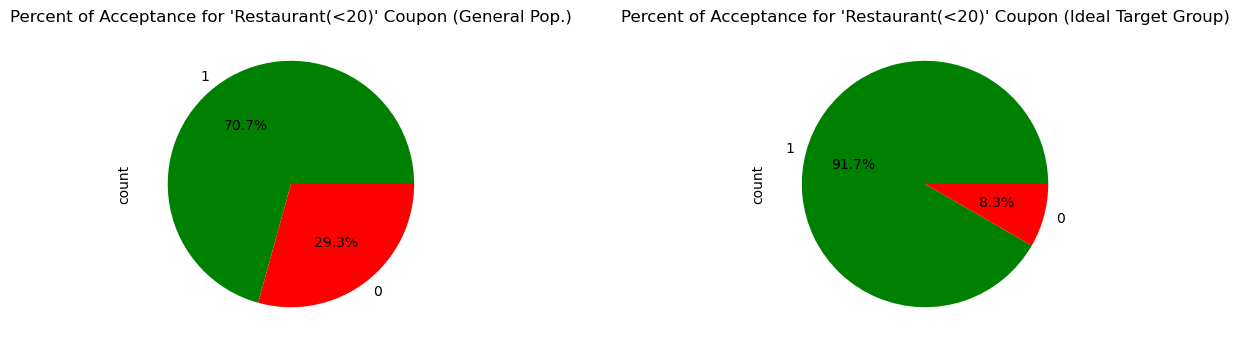

In [972]:
# Exploring the profile of our customer we have found the features that make our 
# idela customer 91% likely to accept vs ~71% for the generat population

print_percent_accepted(ideal_lessThan20_target, 'Restaurant(<20) Target Group')
print_percent_accepted(lessThan20_data, 'Restaurant(<20) (General Population)')
fig, axs = plt.subplots(1, 2)
lessThan20_data['Y'].value_counts().plot.pie(autopct='%1.1f%%',  ax=axs[0], colors=get_pie_y_label_colors(lessThan20_data), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (General Pop.)")
ideal_lessThan20_target['Y'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=get_pie_y_label_colors(ideal_lessThan20_target), figsize=(4,4)).set_title("Percent of Acceptance for 'Restaurant(<20)' Coupon (Ideal Target Group)")
fig.set_size_inches(15,4)
